<a href="https://colab.research.google.com/github/changcw2022/AI_ML/blob/main/classification_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$ area = \frac{1}{x_1^2 + 1} $

$ \sum_P(i, j) $

In [23]:
import pandas as pd

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['ans'] = iris['target']
df.to_csv('iris.csv', encoding='utf-8', index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
import numpy as np
x = np.array(df.drop(['ans'], axis=1))
y = np.array(df['ans'])

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [27]:
# 使用train_test_split切割多組list時，會保持相同的順序
# 90%x, 10%x, 90%y, 10%y
from sklearn.model_selection import train_test_split
train_test_split([1, 2, 3, 4], [5, 6, 7, 8], test_size=0.1)

[[3, 2, 1], [4], [7, 6, 5], [8]]

In [51]:
# 把訓練資料丟給演算法去學習(fit)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.375, 0.875, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 135\nvalue = [45, 45, 45]\nclass = setosa'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 45\nvalue = [45, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 90\nvalue = [0, 45, 45]\nclass = versicolor'),
 Text(0.25, 0.375, 'petal length (cm) <= 5.35\ngini = 0.153\nsamples = 48\nvalue = [0, 44, 4]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.083\nsamples = 46\nvalue = [0, 44, 2]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(0.75, 0.375, 'petal length (cm) <= 4.85\ngini = 0.046\nsamples = 42\nvalue = [0, 1, 41]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = virginica')]

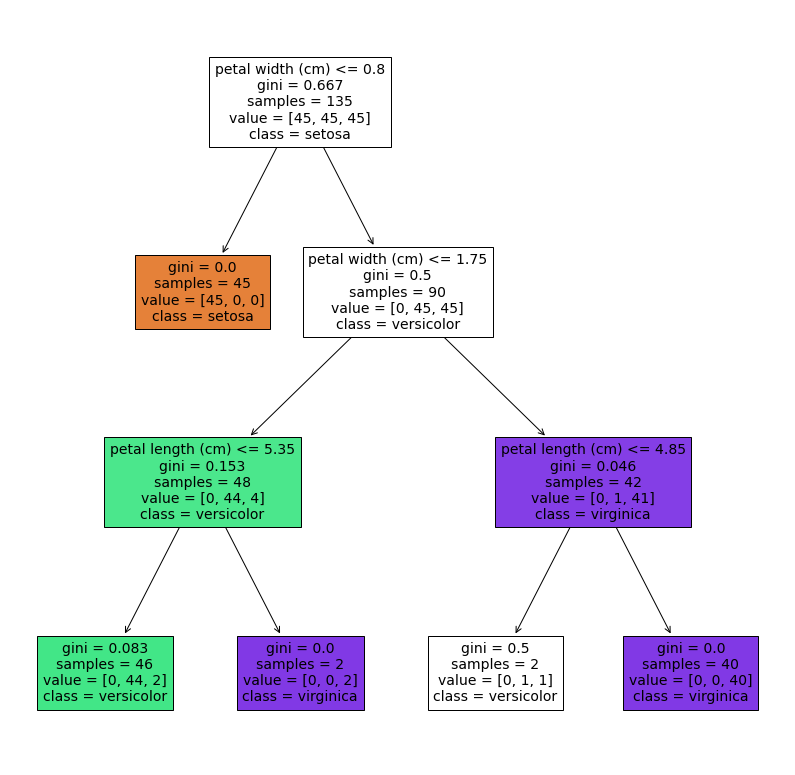

In [52]:
# 先畫出成果
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf, 
          feature_names=iris['feature_names'],
          class_names=iris['target_names'],
          filled=True)


In [53]:
# 測試模型
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.8666666666666667

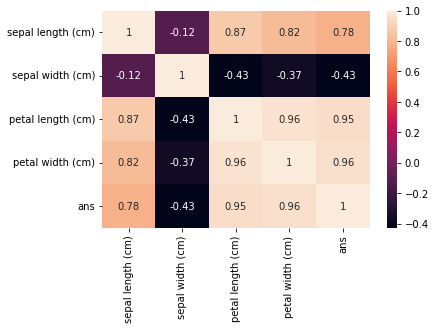

In [55]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)